## Imports

## Set Up ##

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

於啟動期間 - 警告訊息：
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Load Data

In [4]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


載入需要的套件：tidyverse


In [5]:
%%R
# Import data with R
df <- read_csv('merged_food_access_data.csv', show_col_types = FALSE)
df

# A tibble: 4,870 × 152
       GEOID State County Urban Pop2010 Housing_Units GroupQuartersFlag NUMGQTRS
       <dbl> <chr> <chr>  <dbl>   <dbl>         <dbl>             <dbl>    <dbl>
 1   3.60e10 New … Alban…     1    2139           784                 0       79
 2   3.60e10 New … Alban…     1    6046          2514                 0       84
 3   3.60e10 New … Alban…     1    5888          2581                 0      193
 4   3.60e10 New … Alban…     1    2227          1017                 0      575
 5   3.60e10 New … Alban…     1    4415          2196                 0       15
 6   3.60e10 New … Alban…     1    5203            12                 1     5177
 7   3.60e10 New … Alban…     1    3412          1559                 0      117
 8   3.60e10 New … Alban…     1    3448           872                 0     1660
 9   3.60e10 New … Alban…     1    3676          1409                 0      143
10   3.60e10 New … Alban…     1    3821          1413                 0       14
# ℹ 

In [6]:
# Import data in python
df = pd.read_csv('merged_food_access_data.csv')
df

,GEOID,State,County,Urban,Pop2010,Housing_Units,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,Low_Income_1and10,...,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,NAME,Population,Median Income,No Computer,No Internet
0,36001000100,New York,Albany County,1,2139,784,0,79.0,3.69,1,...,9.0,173.0,198.0,179.0,276.0,"Census Tract 1, Albany County, New York",2035.0,32389.0,126.0,83.0
1,36001000200,New York,Albany County,1,6046,2514,0,84.0,1.39,1,...,12.0,490.0,648.0,895.0,960.0,"Census Tract 2, Albany County, New York",4793.0,27714.0,421.0,214.0
2,36001000300,New York,Albany County,1,5888,2581,0,193.0,3.28,1,...,19.0,515.0,615.0,708.0,554.0,"Census Tract 3, Albany County, New York",6147.0,45272.0,335.0,281.0
3,36001000401,New York,Albany County,1,2227,1017,0,575.0,25.82,0,...,2.0,43.0,53.0,139.0,5.0,"Census Tract 4.01, Albany County, New York",2362.0,74274.0,140.0,143.0
4,36001000403,New York,Albany County,1,4415,2196,0,15.0,0.34,0,...,5.0,153.0,201.0,437.0,286.0,"Census Tract 4.03, Albany County, New York",4253.0,74426.0,308.0,304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,36123150100,New York,Yates County,0,5942,2200,0,134.0,2.26,0,...,8.0,73.0,110.0,302.0,289.0,"Census Tract 1501, Yates County, New York",6288.0,54330.0,462.0,383.0
4866,36123150200,New York,Yates County,0,5561,2138,0,287.0,5.16,0,...,7.0,118.0,110.0,421.0,139.0,"Census Tract 1502, Yates County, New York",5440.0,47586.0,574.0,482.0
4867,36123150300,New York,Yates County,0,5348,2074,0,38.0,0.71,0,...,6.0,55.0,49.0,122.0,213.0,"Census Tract 1503, Yates County, New York",5092.0,55694.0,392.0,281.0
4868,36123150400,New York,Yates County,0,3973,1369,0,828.0,20.84,0,...,10.0,58.0,79.0,39.0,53.0,"Census Tract 1504, Yates County, New York",3763.0,71774.0,178.0,189.0


In [58]:
df['TractHUNV'].dtypes

dtype('float64')

In [10]:
# display all column names so I know what I'm working with
df.columns

Index(['GEOID', 'State', 'County', 'Urban', 'Pop2010', 'Housing_Units',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'Low_Income_1and10',
       ...
       'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP',
       'NAME', 'Population', 'Median Income', 'No Computer', 'No Internet'],
      dtype='object', length=152)

In [27]:
# create a new dataframe with these columns: TractLOWI	TractKids	TractSeniors	TractWhite	TractBlack	TractAsian	TractNHOPI	TractAIAN	TractOMultir	TractHispanic	TractHUNV	TractSNAP LAPOP1_10	LAPOP05_10	LAPOP1_20	LALOWI1_10	LALOWI05_10	LALOWI1_20	lapophalf	lapophalfshare	lalowihalf	lalowihalfshare	lakidshalf	lakidshalfshare	laseniorshalf	laseniorshalfshare	lawhitehalf	lawhitehalfshare	lablackhalf	lablackhalfshare	laasianhalf	laasianhalfshare	lanhopihalf	lanhopihalfshare	laaianhalf	laaianhalfshare	laomultirhalf	laomultirhalfshare	lahisphalf	lahisphalfshare	lahunvhalf	lahunvhalfshare	lasnaphalf	lasnaphalfshare	lapop1	lapop1share	lalowi1	lalowi1share	lakids1	lakids1share	laseniors1	laseniors1share	lawhite1	lawhite1share	lablack1	lablack1share	laasian1	laasian1share	lanhopi1	lanhopi1share	laaian1	laaian1share	laomultir1	laomultir1share	lahisp1	lahisp1share	lahunv1	lahunv1share	lasnap1	lasnap1share
df_simple = df[['TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP', 'LAPOP1_10', 'LAPOP05_10', 'LAPOP1_20', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare', 'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare', 'lawhitehalf', 'lawhitehalfshare', 'lablackhalf', 'lablackhalfshare', 'laasianhalf', 'laasianhalfshare', 'lanhopihalf', 'lanhopihalfshare', 'laaianhalf', 'laaianhalfshare', 'laomultirhalf', 'laomultirhalfshare', 'lahisphalf', 'lahisphalfshare', 'lahunvhalf', 'lahunvhalfshare', 'lasnaphalf', 'lasnaphalfshare', 'lapop1', 'lapop1share', 'lalowi1', 'lalowi1share', 'lakids1', 'lakids1share', 'laseniors1', 'laseniors1share', 'lawhite1', 'lawhite1share', 'lablack1', 'lablack1share', 'laasian1', 'laasian1share', 'lanhopi1', 'lanhopi1share', 'laaian1', 'laaian1share', 'laomultir1', 'laomultir1share', 'lahisp1', 'lahisp1share', 'lahunv1', 'lahunv1share', 'lasnap1', 'lasnap1share', 'Population', 'Median Income', 'No Computer', 'No Internet']]
df_simple

,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,...,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,Population,Median Income,No Computer,No Internet
0,1183.0,644.0,218.0,506.0,1396.0,55.0,0.0,9.0,173.0,198.0,...,198.0,9.26,172.0,21.94,259.0,32.97,2035.0,32389.0,126.0,83.0
1,2501.0,1946.0,401.0,840.0,4647.0,57.0,0.0,12.0,490.0,648.0,...,372.0,6.15,612.0,24.36,556.0,22.13,4793.0,27714.0,421.0,214.0
2,3006.0,1297.0,859.0,2941.0,2199.0,213.0,1.0,19.0,515.0,615.0,...,50.0,0.85,70.0,2.72,129.0,4.99,6147.0,45272.0,335.0,281.0
3,445.0,149.0,1088.0,1921.0,205.0,56.0,0.0,2.0,43.0,53.0,...,13.0,0.60,36.0,3.55,1.0,0.13,2362.0,74274.0,140.0,143.0
4,865.0,531.0,679.0,3386.0,427.0,443.0,1.0,5.0,153.0,201.0,...,24.0,0.54,44.0,1.98,24.0,1.08,4253.0,74426.0,308.0,304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,2467.0,1624.0,1015.0,5787.0,54.0,19.0,1.0,8.0,73.0,110.0,...,88.0,1.48,171.0,7.76,181.0,8.23,6288.0,54330.0,462.0,383.0
4866,1731.0,1433.0,1074.0,5363.0,57.0,16.0,0.0,7.0,118.0,110.0,...,25.0,0.44,159.0,7.42,60.0,2.80,5440.0,47586.0,574.0,482.0
4867,1853.0,1307.0,747.0,5248.0,23.0,16.0,0.0,6.0,55.0,49.0,...,49.0,0.92,125.0,6.01,228.0,11.00,5092.0,55694.0,392.0,281.0
4868,476.0,611.0,626.0,3823.0,53.0,26.0,3.0,10.0,58.0,79.0,...,60.0,1.51,21.0,1.50,42.0,3.09,3763.0,71774.0,178.0,189.0


In [28]:
%%R -i df_simple
# correlation matrix of df_simple
cor(df_simple) %>% round(2)

                   TractLOWI TractKids TractSeniors TractWhite TractBlack
TractLOWI               1.00      0.62         0.19      -0.02       0.46
TractKids               0.62      1.00         0.47       0.48       0.30
TractSeniors            0.19      0.47         1.00       0.68       0.01
TractWhite             -0.02      0.48         0.68       1.00      -0.42
TractBlack              0.46      0.30         0.01      -0.42       1.00
TractAsian              0.21      0.09         0.20      -0.02      -0.09
TractNHOPI              0.27      0.22         0.05      -0.02       0.19
TractAIAN               0.30      0.19         0.01      -0.08       0.14
TractOMultir            0.68      0.46         0.05      -0.17       0.35
TractHispanic           0.68      0.47         0.08      -0.14       0.35
TractHUNV               0.56      0.23         0.26       0.01       0.38
TractSNAP               0.87      0.48         0.13      -0.15       0.52
LAPOP1_10                 NA        NA

In [29]:
%%R
# find the lowest correlation
cor(df_simple) %>% round(2) %>% as.data.frame() %>% 
  rownames_to_column('row') %>% 
  gather('column', 'correlation', -row) %>% 
  arrange(correlation) %>% 
  head(20)

             row        column correlation
1     TractBlack    TractWhite       -0.42
2     TractWhite    TractBlack       -0.42
3   TractOMultir    TractWhite       -0.17
4     TractWhite  TractOMultir       -0.17
5      TractSNAP    TractWhite       -0.15
6     TractWhite     TractSNAP       -0.15
7  TractHispanic    TractWhite       -0.14
8     TractWhite TractHispanic       -0.14
9     TractAsian    TractBlack       -0.09
10    TractBlack    TractAsian       -0.09
11     TractAIAN    TractWhite       -0.08
12    TractWhite     TractAIAN       -0.08
13    TractWhite     TractLOWI       -0.02
14     TractLOWI    TractWhite       -0.02
15    TractAsian    TractWhite       -0.02
16    TractNHOPI    TractWhite       -0.02
17    TractWhite    TractAsian       -0.02
18    TractWhite    TractNHOPI       -0.02
19    TractBlack  TractSeniors        0.01
20     TractAIAN  TractSeniors        0.01


### Note: There's pretty clear negative correlation between white population and other races and low-income population

In [30]:
%%R
# find the highest correlation that are <1
cor(df_simple) %>% round(2) %>% as.data.frame() %>% 
  rownames_to_column('row') %>% 
  gather('column', 'correlation', -row) %>% 
  filter(correlation < 1) %>% 
  arrange(desc(correlation)) %>% 
  head(30)

             row        column correlation
1  TractHispanic  TractOMultir        0.98
2   TractOMultir TractHispanic        0.98
3    No Internet   No Computer        0.93
4    No Computer   No Internet        0.93
5      TractSNAP     TractLOWI        0.87
6      TractLOWI     TractSNAP        0.87
7     Population     TractKids        0.80
8      TractKids    Population        0.80
9    No Computer     TractLOWI        0.75
10     TractLOWI   No Computer        0.75
11   No Computer     TractSNAP        0.74
12     TractSNAP   No Computer        0.74
13    Population  TractSeniors        0.71
14  TractSeniors    Population        0.71
15  TractOMultir     TractLOWI        0.68
16 TractHispanic     TractLOWI        0.68
17   No Internet     TractLOWI        0.68
18    TractWhite  TractSeniors        0.68
19  TractSeniors    TractWhite        0.68
20     TractLOWI  TractOMultir        0.68
21     TractLOWI TractHispanic        0.68
22   No Internet     TractSNAP        0.68
23     Trac

In [48]:
%%R
# filter df_simple to only low-access tracts (LA1and10=1)
df_low_access = df_simple %>% filter(LAPOP1_10 == 1)
df_low_access

     TractLOWI TractKids TractSeniors TractWhite TractBlack TractAsian
47         296       509          375       2152         98        153
633       1915       737          667       4366         86         41
704        670       479          712       2441         44         56
799       1698       765          280       1063        960         12
882        915       789          952       4005         11         21
1074      2166      1072          244       2601        302         43
2308       233       688          432       2534         22         94
2692       937       808          641       3656        130         20
2726      1399       656          358       1913        412        103
3991      1388       985          856       4302         14         22
4292      2139      1324          431       2497        770         37
4298       673       169          446       1350        380         67
4573       988       423          452       2355         21         44
4774  

`geom_smooth()` using formula = 'y ~ x'


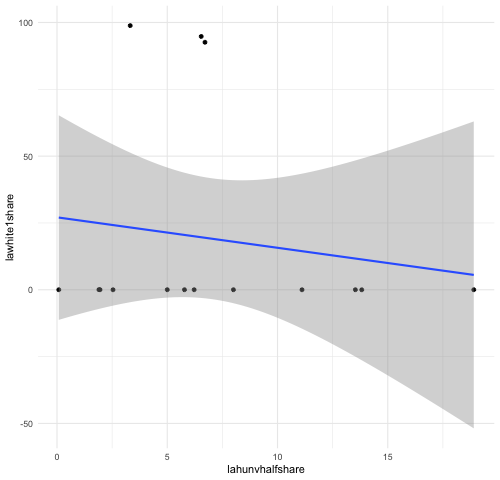

In [49]:
%%R -w 500
# plot "lahunvhalfshare" with "lawhite1share"
df_low_access %>% 
  ggplot(aes(x = lahunvhalfshare, y = lawhite1share)) +
  geom_point() +
  geom_smooth(method = 'lm') +
        theme_minimal()
        
        

`geom_smooth()` using formula = 'y ~ x'


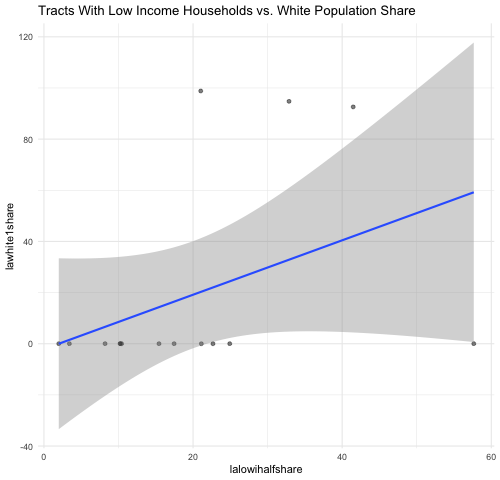

In [74]:
%%R -w 500
# plot "lalowihalfshare" with "lawhite1share"
df_low_access %>% 
  ggplot(aes(x = lalowihalfshare, y = lawhite1share)) +
  geom_point(alpha=.5) +
  ggtitle('Tracts With Low Income Households vs. White Population Share') +
    geom_smooth(method = 'lm') +
        theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


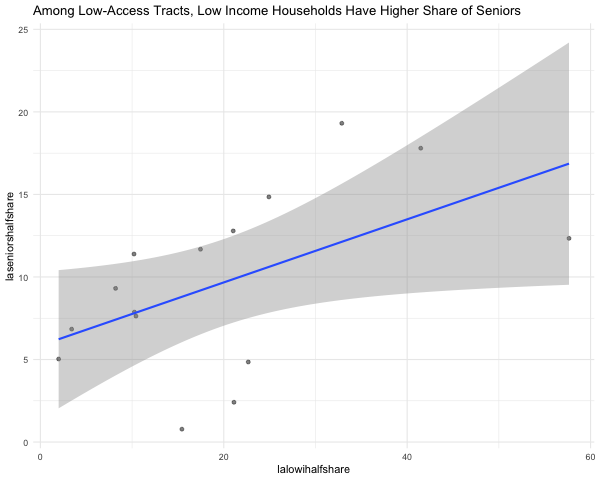

In [71]:
%%R -w 600
# plot "lalowihalfshare" with "laseniorshalfshare"
df_low_access %>% 
  ggplot(aes(x = lalowihalfshare, y = laseniorshalfshare)) +
  geom_point(alpha=.5) +
  # add a title
  ggtitle('Among Low-Access Tracts, Low Income Households Have Higher Share of Seniors') +
    geom_smooth(method = 'lm') +
        theme_minimal()

## Regression Model

In [59]:
%%R 

model <- lm(lalowihalfshare ~ lawhite1share, data = df_low_access) 
model


Call:
lm(formula = lalowihalfshare ~ lawhite1share, data = df_low_access)

Coefficients:
  (Intercept)  lawhite1share  
      17.0331         0.1522  



In [60]:
%%R 

summary(model)


Call:
lm(formula = lalowihalfshare ~ lawhite1share, data = df_low_access)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.046  -7.834  -1.606   4.856  40.614 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)   17.03307    4.09914   4.155  0.00113 **
lawhite1share  0.15222    0.09604   1.585  0.13700   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.2 on 13 degrees of freedom
Multiple R-squared:  0.1619,	Adjusted R-squared:  0.09747 
F-statistic: 2.512 on 1 and 13 DF,  p-value: 0.137



In [72]:
%%R 

model2 <- lm(lalowihalfshare ~ laseniorshalfshare, data = df_low_access) 
model2


Call:
lm(formula = lalowihalfshare ~ laseniorshalfshare, data = df_low_access)

Coefficients:
       (Intercept)  laseniorshalfshare  
             5.575               1.487  



In [73]:
%%R 

summary(model2)


Call:
lm(formula = lalowihalfshare ~ laseniorshalfshare, data = df_low_access)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.338  -9.048  -3.567   9.063  33.722 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)          5.5750     7.1734   0.777   0.4510  
laseniorshalfshare   1.4873     0.6546   2.272   0.0407 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.12 on 13 degrees of freedom
Multiple R-squared:  0.2842,	Adjusted R-squared:  0.2291 
F-statistic: 5.161 on 1 and 13 DF,  p-value: 0.04073

